In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the cleaned dataset
df = pd.read_csv("df_extended.csv", index_col=0)

# Calculate changes in rank for universities over the years

In [3]:
def calculate_rank_change(df):
    df = df.sort_values(by=["Name", "Year"])  # Ensure sorting
    df["Rank Change"] = df.groupby("Name")["Rank"].diff()
    return df

df = calculate_rank_change(df)
 

# Analyze correlation of features with Rank


Correlation with Rank:
Rank                       1.000000
GII                        0.384940
Year                       0.379689
Population                 0.051459
Student Population         0.005922
Students to Staff Ratio    0.004559
GDP                       -0.253212
CO2                       -0.356841
HDI                       -0.473000
Industry Impact           -0.498642
Corruption                -0.531019
International Outlook     -0.579548
Teaching                  -0.643042
Research Environment      -0.710603
Research Quality          -0.807047
Overall Score             -0.848774
Name: Rank, dtype: float64


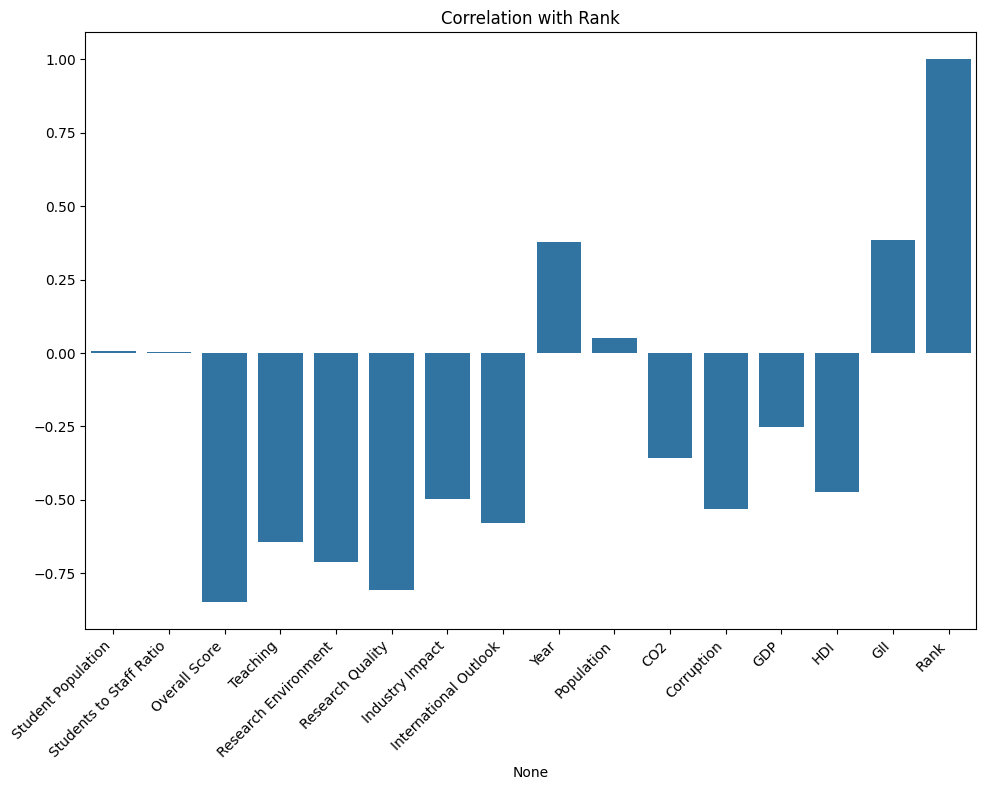

In [4]:
def correlation_with_rank(df):
   
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    # Exclude targets
    numeric_columns = [col for col in numeric_columns if col not in ["Rank", "Rank Change"]]  

    correlation = df[numeric_columns + ["Rank"]].corr()["Rank"]
    print("\nCorrelation with Rank:")
    print(correlation.sort_values(ascending=False))

    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlation.index, y=correlation.values)
    plt.xticks(rotation=45, ha='right')
    plt.title("Correlation with Rank")
    plt.tight_layout()
    plt.show()

correlation_with_rank(df)

### **Correlation of features with Rank**

#### **Strongest Connections to Higher Rank**:
1. **Overall Score** (`-0.85`): Strongest predictor of better rankings.
2. **Research Quality** (`-0.80`): High-quality research drives better performance.
3. **Research Environment** (`-0.71`): Supportive environments boost rankings.
4. **Teaching** (`-0.64`): Investment in teaching quality is crucial.
5. **International Outlook** (`-0.58`): Diversity and collaboration matter.
6. **Industry Impact** (`-0.49`): Industry connections improve rankings.
7. **Human Development Index (HDI)** (`-0.47`): Better living standards correlate with higher ranks.
8. **Corruption** (`-0.53`): Less corruption improves rankings.

#### **Weaker but Notable Factors**:
- **GDP** (`-0.25`) and **CO2** (`-0.35`): Weak positive impacts on better rankings.

#### **Factors Linked to Worse Rankings**:
1. **Gender Inequality (GII)** (`+0.38`): Higher inequality correlates with worse rankings.
2. **Year** (`+0.37`): Reflects trends or regional improvements over time.

---

### **Takeaway**
The key drivers of better rankings are **academic excellence (Overall Score, Research)**, **teaching quality**, and **global engagement (International Outlook, Industry Impact)**, with some influence from country-level factors like HDI and corruption.

# Determine feature importance for predicting Rank without Overall Score

Mean Squared Error for Rank Prediction (Excluding Overall Score): 1347.9692557314972


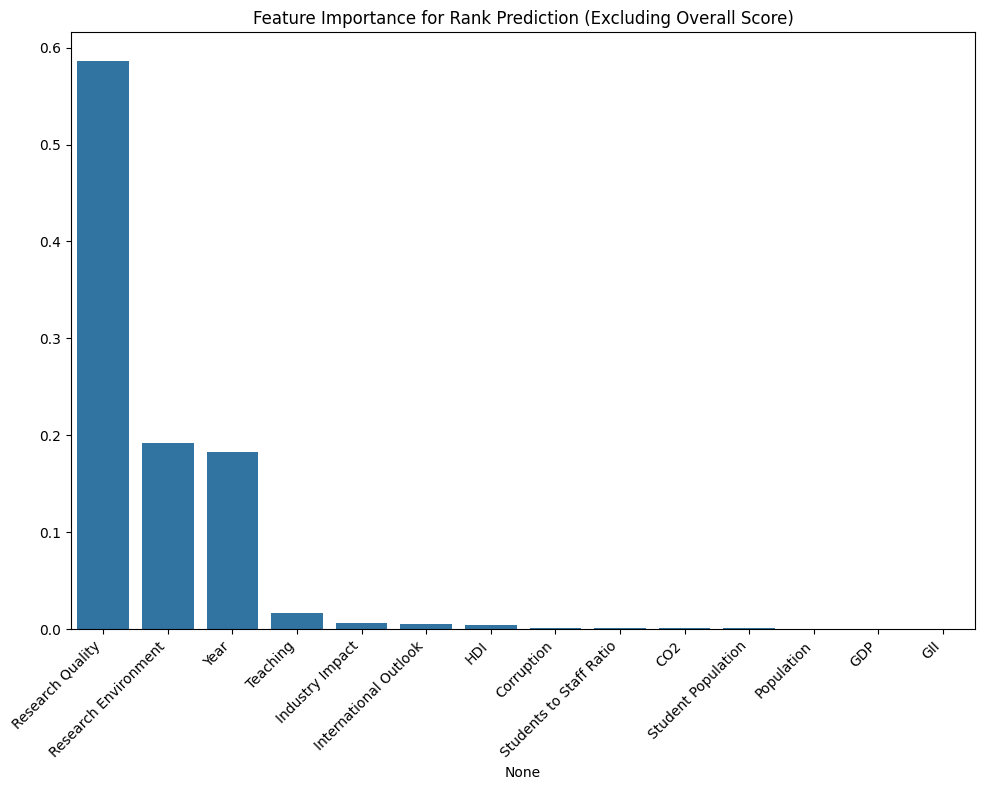

In [5]:
def feature_importance(df):
    features = df.select_dtypes(include=[np.number]).drop(columns=["Rank", "Rank Change", "Overall Score"]).columns
    X = df[features].fillna(0)  
    y = df["Rank"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for Rank Prediction (Excluding Overall Score): {mse}")

    # Plot feature importance
    importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=importance.index, y=importance.values)
    plt.xticks(rotation=45, ha='right')
    plt.title("Feature Importance for Rank Prediction (Excluding Overall Score)")
    plt.tight_layout()
    plt.show()

feature_importance(df)

### **Feature importance**

The code uses a Random Forest Regressor to identify which features most influence university rankings, excluding "Overall Score." The model evaluates feature importance and visualizes it through a bar plot.

#### **Key Results**
- **Top Features**:
  1. **Research Quality**: Most influential for rankings.
  2. **Research Environment**: Second most impactful.
  3. **Year**: Reflects temporal trends.
  
- **Moderate Influence**:
  - **Teaching**, **Industry Impact**, and **International Outlook**.

- **Least Important**:
  - **Country-level metrics** like HDI, Corruption, and GDP.

#### **Takeaway**:
Research-related features dominate rank prediction, while socio-economic factors contribute minimally.

# Analyze feature differences for top improvers and decliners 


Top Improvers:
                                                    Name  Year    Rank  \
7665   Saveetha Institute of Medical and Technical Sc...  2022   601.0   
6113                               Sumy State University  2021   575.0   
13571                                   Inönü University  2025  1142.0   
9374                                     Taif University  2023   648.0   
11220                   The Catholic University of Korea  2024   695.0   
6023            Bauman Moscow State Technical University  2021   485.0   
9437   National Yunlin University of Science and Tech...  2023   711.0   
11102                          Pusan National University  2024   577.0   
11578                                 Akdeniz University  2024  1053.0   
7743                          Wenzhou Medical University  2022   679.0   

       Rank Change  
7665        -908.0  
6113        -639.0  
13571       -621.0  
9374        -586.0  
11220       -565.0  
6023        -467.0  
9437        -462.0  
1

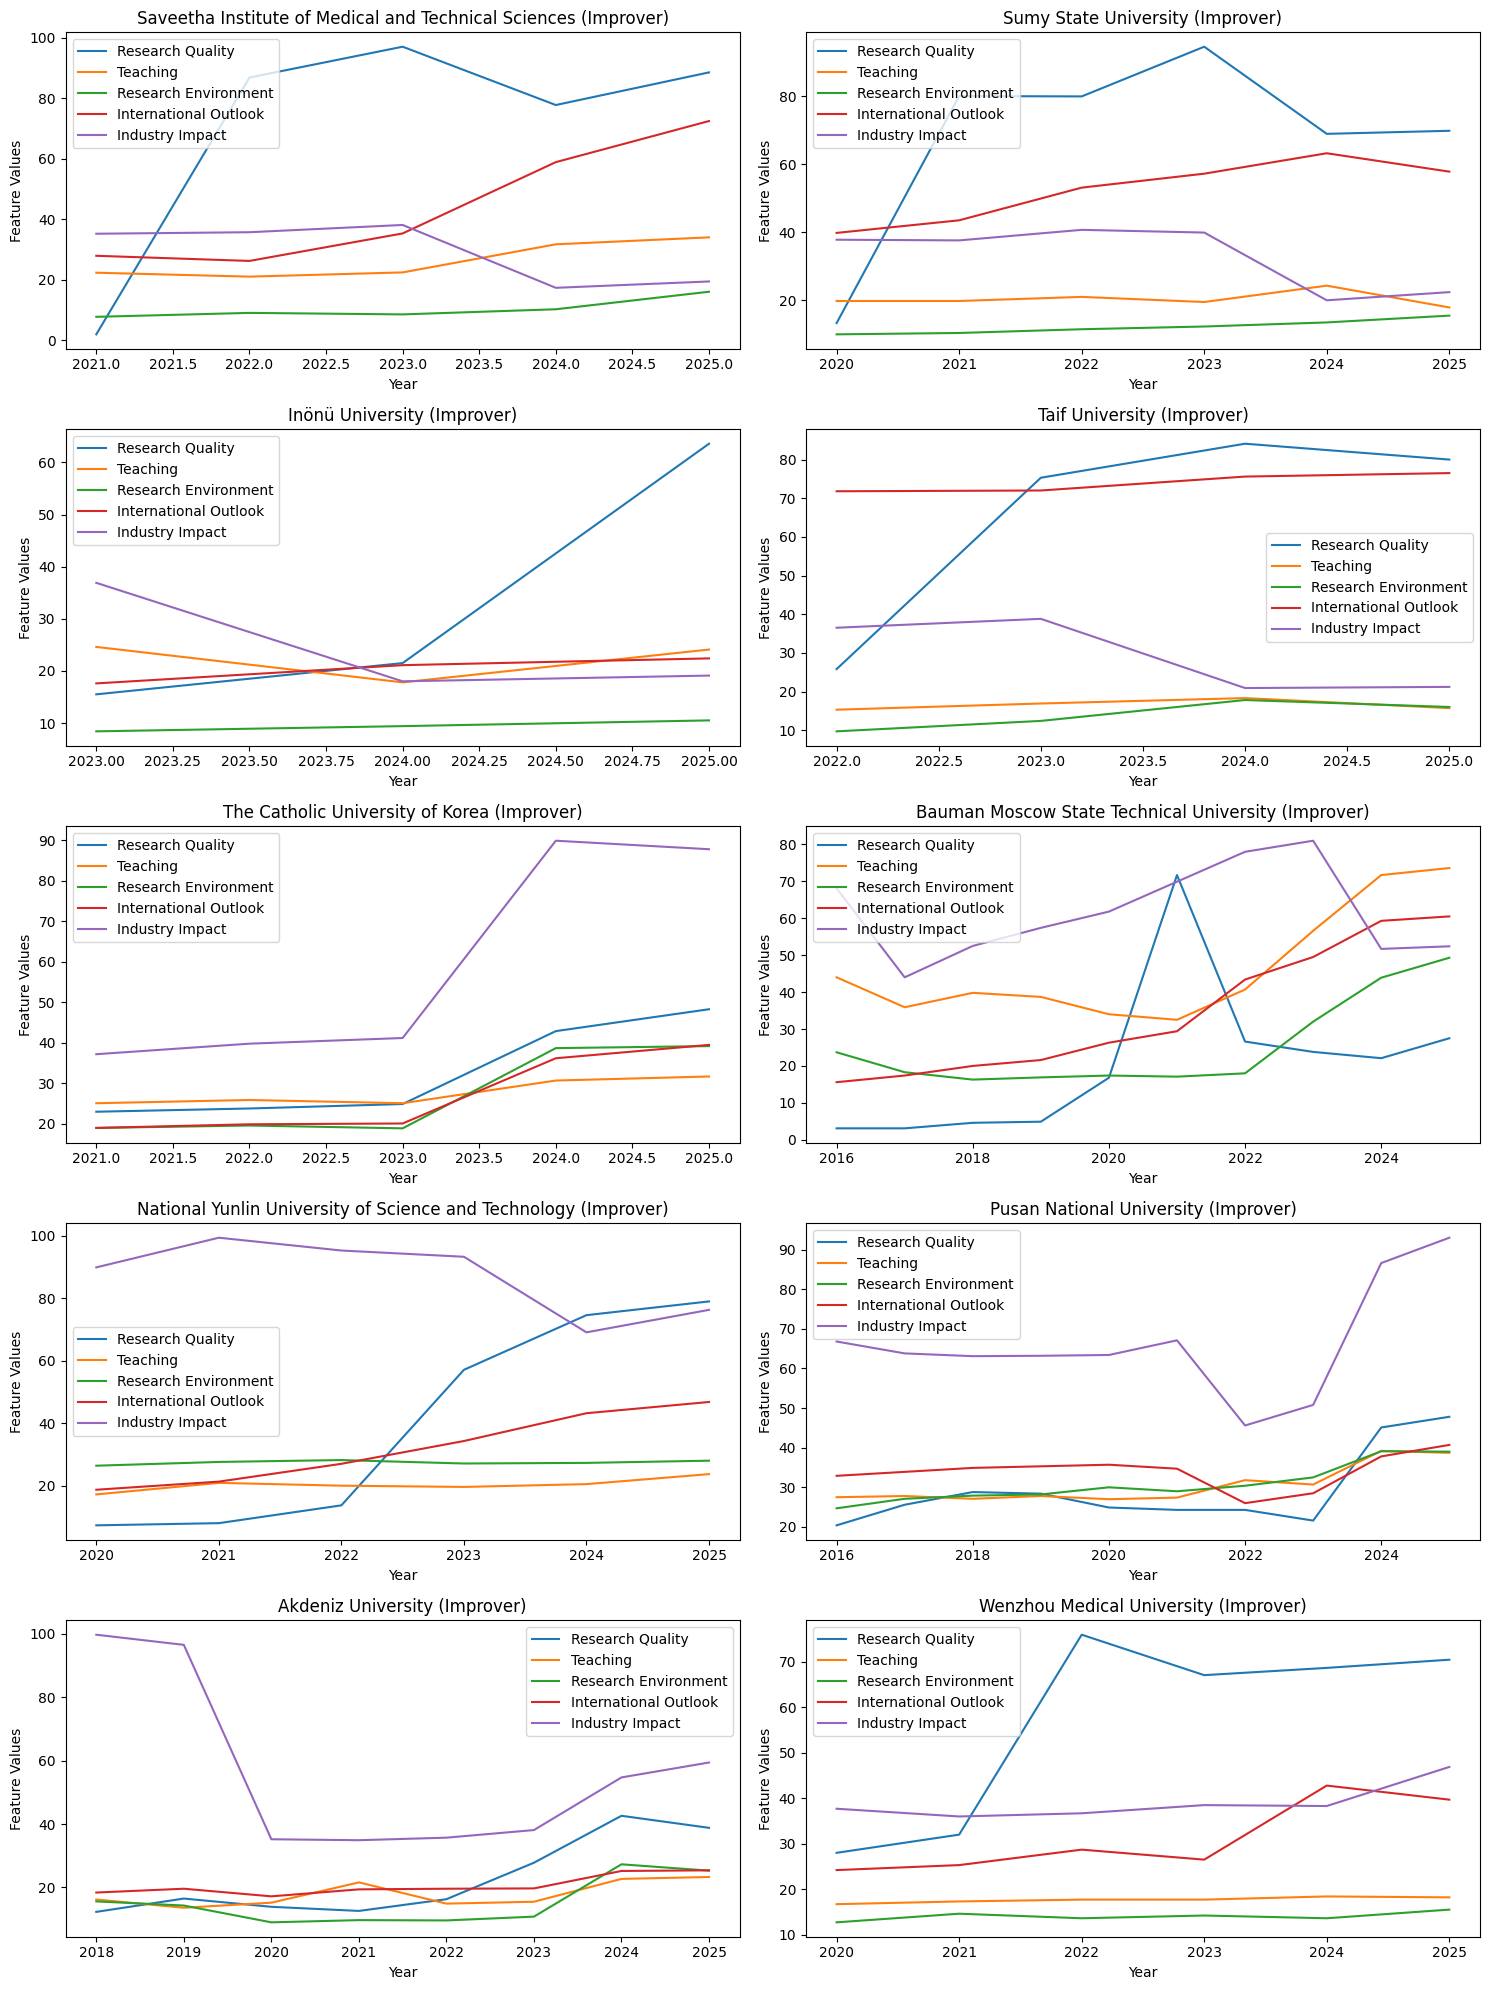

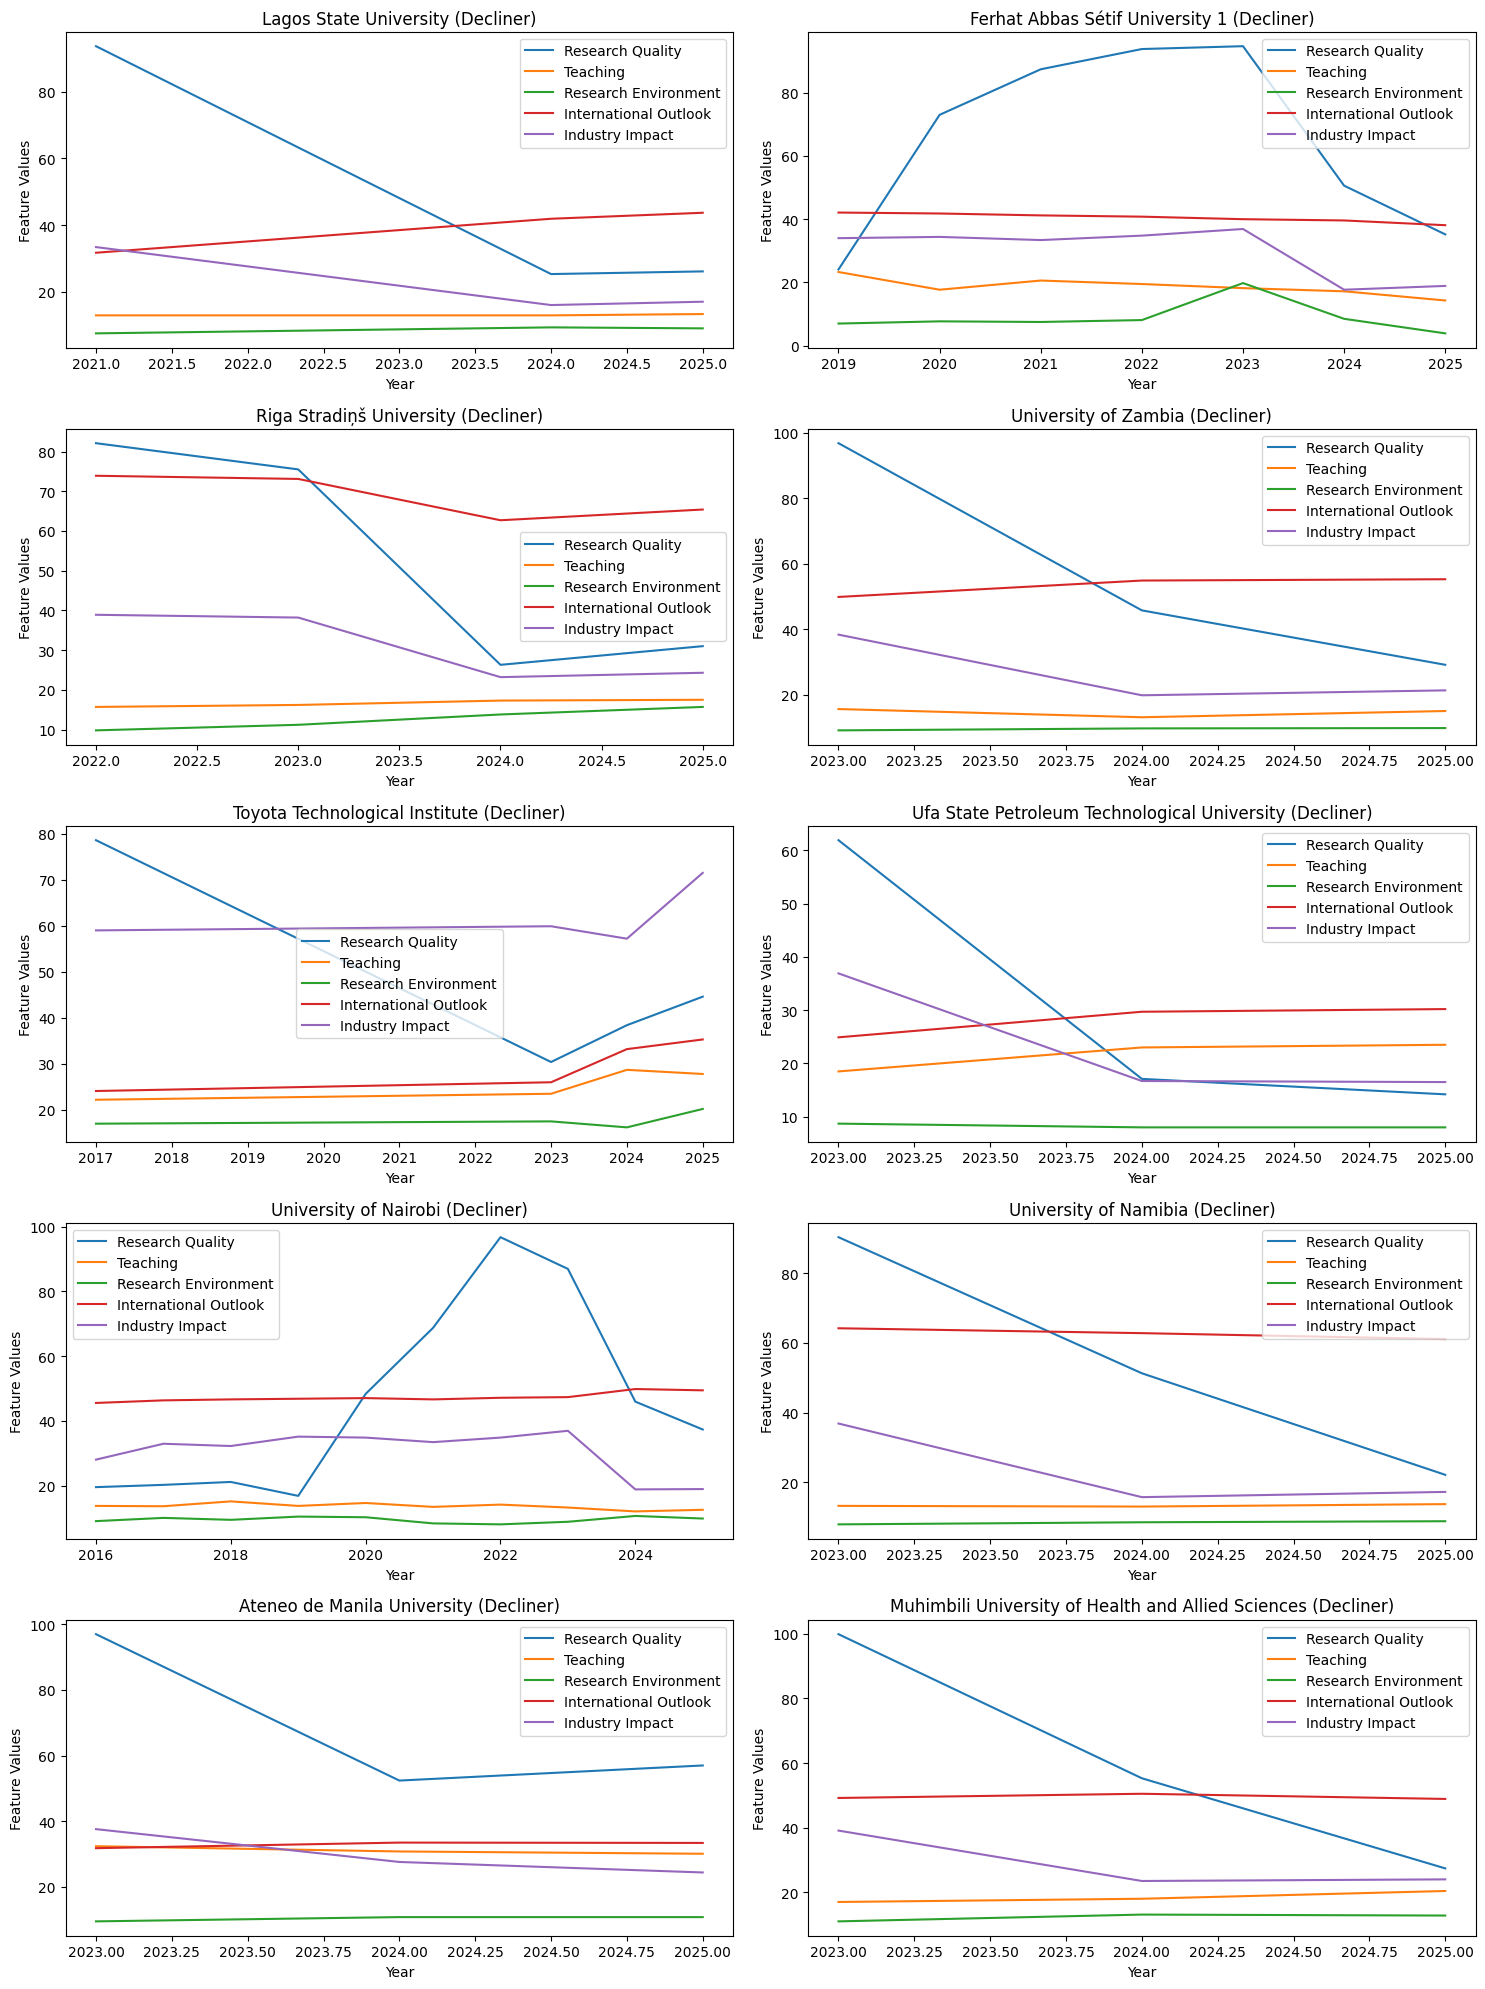

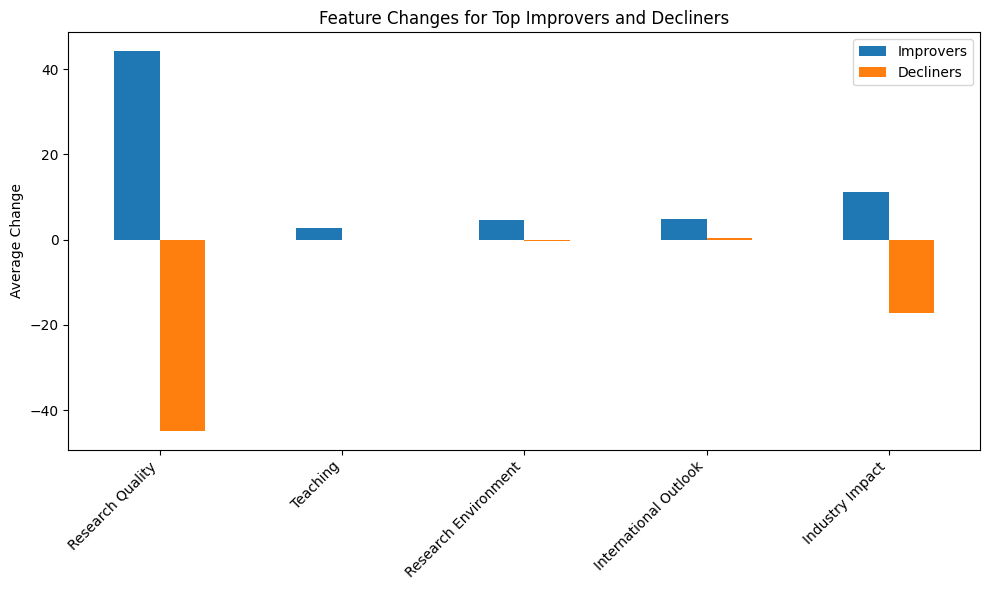

In [6]:
def investigate_top_movers(df):
    
    df_top_movers = df[~df["Rank Change"].isnull()]  

    # Identify top improvers and decliners
    top_improvers = df_top_movers.nsmallest(10, "Rank Change")  
    top_decliners = df_top_movers.nlargest(10, "Rank Change")  

    # Output Top Movers
    print("\nTop Improvers:")
    print(top_improvers[["Name", "Year", "Rank", "Rank Change"]])

    print("\nTop Decliners:")
    print(top_decliners[["Name", "Year", "Rank", "Rank Change"]])

    # Define key features for comparison
    key_features = ["Research Quality", "Teaching", "Research Environment", "International Outlook", "Industry Impact"]

    # Visualize Feature Changes for Improvers
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    axes = axes.flatten()
    for i, (index, row) in enumerate(top_improvers.iterrows()):
        name = row["Name"]
        university_data = df[df["Name"] == name].sort_values("Year")
        university_data[key_features + ["Year"]].set_index("Year").plot(ax=axes[i])
        axes[i].set_title(f"{name} (Improver)")
        axes[i].set_ylabel("Feature Values")
        axes[i].set_xlabel("Year")
    plt.tight_layout()
    plt.show()

    # Visualize Feature Changes for Decliners 
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    axes = axes.flatten()
    for i, (index, row) in enumerate(top_decliners.iterrows()):
        name = row["Name"]
        university_data = df[df["Name"] == name].sort_values("Year")
        university_data[key_features + ["Year"]].set_index("Year").plot(ax=axes[i])
        axes[i].set_title(f"{name} (Decliner)")
        axes[i].set_ylabel("Feature Values")
        axes[i].set_xlabel("Year")
    plt.tight_layout()
    plt.show()

    # Grouped Bar Plot for Improvers and Decliners
    improvers_stats = []
    decliners_stats = []
    for index, row in top_improvers.iterrows():
        name = row["Name"]
        year = row["Year"]
        previous_year = df[(df["Name"] == name) & (df["Year"] == year - 1)]
        if not previous_year.empty:
            diff = row[key_features] - previous_year[key_features].iloc[0]
            improvers_stats.append(diff)

    for index, row in top_decliners.iterrows():
        name = row["Name"]
        year = row["Year"]
        previous_year = df[(df["Name"] == name) & (df["Year"] == year - 1)]
        if not previous_year.empty:
            diff = row[key_features] - previous_year[key_features].iloc[0]
            decliners_stats.append(diff)

    improvers_stats = pd.DataFrame(improvers_stats, columns=key_features)
    decliners_stats = pd.DataFrame(decliners_stats, columns=key_features)

    improvers_mean = improvers_stats.mean()
    decliners_mean = decliners_stats.mean()
    df_changes = pd.DataFrame({"Improvers": improvers_mean, "Decliners": decliners_mean})

    df_changes.plot(kind="bar", figsize=(10, 6))
    plt.title("Feature Changes for Top Improvers and Decliners")
    plt.ylabel("Average Change")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

investigate_top_movers(df)